In [1]:
cd ../../../

/Users/flamholz/Documents/workspace/human_impacts


In [2]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from datetime import datetime

import anthro.viz
colors = anthro.viz.plotting_style()
s_per_year = 60*60*24*365

In [3]:
# Load all the data and add a timestamp column to it.

# Human population data
human_pop_df = pd.read_csv('data/anthropocentric/FAOSTAT_world_population/processed/FAOSTAT_total_population.csv')
# Assume population measured on Jan 1 every year.
datetimes = [datetime(year, month=1, day=1) for year in human_pop_df.Year]
ts = [dt.timestamp() for dt in datetimes]
human_pop_df['timestamp'] = ts

human_pop_df

,Year,population,timestamp
0,1950,2536431149,-6.311232e+08
1,1951,2584034261,-5.995872e+08
2,1952,2630861562,-5.680512e+08
3,1953,2677608960,-5.364288e+08
4,1954,2724846741,-5.048928e+08
...,...,...,...
64,2014,7295290765,1.388563e+09
65,2015,7379797139,1.420099e+09
66,2016,7464022049,1.451635e+09
67,2017,7547858925,1.483258e+09


In [4]:
# Atmospheric CO2 from mauna loa
atm_co2_contemporary_df = pd.read_csv('data/atmosphere_biogeochemistry/mauna_loa/monthly_in_situ_co2_mlo_formatted.csv')
yr = atm_co2_contemporary_df.year
mn = atm_co2_contemporary_df.month
datetimes = [datetime(year, month, 15, hour=23, minute=59, second=59) for year, month in zip(yr, mn)]
ts = [dt.timestamp() for dt in datetimes]
atm_co2_contemporary_df['timestamp'] = ts

mask = atm_co2_contemporary_df.CO2_fit_ppm > 0
masked_co2_df = atm_co2_contemporary_df[mask]

masked_co2_df.head()

,year,month,date_excel,date,CO2_ppm,CO2_seasonally_adjusted_ppm,CO2_fit_ppm,CO2_seasonally_adjusted_fit_ppm,CO2_filled_ppm,CO2_seasonally_adjusted_filled_ppm,timestamp
2,1958,3,21259,1958.2027,315.70,314.44,316.19,314.91,315.70,314.44,-372268801.0
3,1958,4,21290,1958.2877,317.45,315.16,317.30,314.99,317.45,315.16,-369590401.0
4,1958,5,21320,1958.3699,317.51,314.71,317.86,315.06,317.51,314.71,-367002001.0
5,1958,6,21351,1958.4548,-99.99,-99.99,317.24,315.14,317.24,315.14,-364323601.0
6,1958,7,21381,1958.5370,315.86,315.19,315.86,315.22,315.86,315.19,-361731601.0


In [5]:
# Livestock population data
livestock_pop_df = pd.read_csv('data/agriculture/FAOSTAT_livestock_population/processed/FAOSTAT_livestock_population.csv')
# Assume population measured on Jan 1 every year.
datetimes = [datetime(year, month=1, day=1) for year in livestock_pop_df.year]
ts = [dt.timestamp() for dt in datetimes]
livestock_pop_df['timestamp'] = ts
livestock_pop_df['population'] = livestock_pop_df.population_Mhd * 1000000

cattle_df = livestock_pop_df[livestock_pop_df.animal == 'cattle']
chicken_df = livestock_pop_df[livestock_pop_df.animal == 'chicken']
swine_df = livestock_pop_df[livestock_pop_df.animal == 'swine']

cattle_df.head()

,animal,year,population_Mhd,timestamp,population
290,cattle,1961,942.175069,-283968000.0,9.421751e+08
291,cattle,1962,957.172513,-252432000.0,9.571725e+08
292,cattle,1963,970.382904,-220896000.0,9.703829e+08
293,cattle,1964,987.575200,-189360000.0,9.875752e+08
294,cattle,1965,1008.908424,-157737600.0,1.008908e+09


In [6]:
# timepoints are integer timestamps
# make yearly ticks for the plot
# TODO(flamholz): might have an off by 1 error here.
xticks = np.arange(1960, 2021, 10)
s_per_year = 60*60*24*365
# first tick is 1960
year_zero = datetime(1960, 1, 1).timestamp()
xs = year_zero + ((xticks-1958)*s_per_year)
print(year_zero)
print(xs)
print(xticks)

-315590400.0
[-2.5251840e+08  6.2841600e+07  3.7820160e+08  6.9356160e+08
  1.0089216e+09  1.3242816e+09  1.6396416e+09]
[1960 1970 1980 1990 2000 2010 2020]


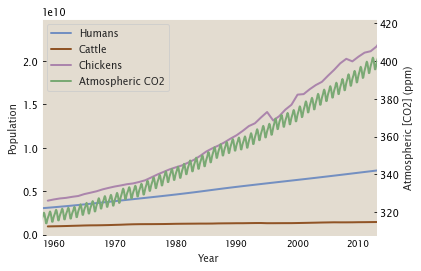

In [7]:
!mkdir -p figures/dynamics
fig = plt.figure()

human_lns = plt.plot(human_pop_df.timestamp, human_pop_df.population, color=colors['blue'], lw=2, label='Humans')
cattle_lns = plt.plot(cattle_df.timestamp, cattle_df.population, color=colors['dark_brown'], lw=2, label='Cattle')
chicken_lns = plt.plot(chicken_df.timestamp, chicken_df.population, color=colors['purple'], lw=2, label='Chickens')

plt.ylabel('Population')
plt.xlabel('Year')
plt.xticks(xs, xticks, fontsize=9)
plt.xlim(year_zero, year_zero+(55*s_per_year))

ax2 = plt.twinx()
co2_lns = plt.plot(masked_co2_df.timestamp, masked_co2_df.CO2_fit_ppm,
         color=colors['green'], lw=2, label='Atmospheric CO2')
plt.ylabel('Atmospheric [CO2] (ppm)')

leg = human_lns + cattle_lns + chicken_lns + co2_lns
labs = [l.get_label() for l in leg]
ax2.legend(leg, labs, loc=2)
plt.xticks(xs, xticks, fontsize=9)
plt.xlim(year_zero, year_zero+(55*s_per_year))

plt.savefig('figures/dynamics/dynamics_ex1.png', dpi=300)
plt.show()